# Ch. 03.04.04 Pima Indians Example

## Loading data

Import the necessary modules:

In [1]:
import os
import numpy as np
import pylab as pl
import pcn
from sklearn.metrics import confusion_matrix, roc_curve, auc

Load dataset:

In [2]:
os.chdir("../../../datasets/pima-indians-diabetes")
pima = np.loadtxt("pima-indians-diabetes.data", delimiter = ",")
os.chdir("../../textbook solutions/Machine Learning - an Algorithmic Perspective/examples/")

Make sure the dataset is loaded:

In [3]:
print(np.shape(pima) == (768, 9))

True


Get the indices for label 0 and label 1:

In [4]:
indices0 = np.where(pima[:, 8] == 0)
indices1 = np.where(pima[:, 8] == 1)

print(np.size(indices0) + np.size(indices1) == 768)

True


Plot the first two feature variables for both index type:

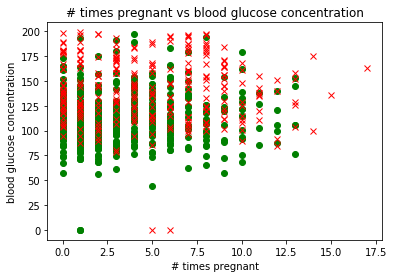

In [5]:
pl.plot(pima[indices0, 0], pima[indices0, 1], "go")
pl.plot(pima[indices1, 0], pima[indices1, 1], "rx")
pl.xlabel("# times pregnant")
pl.ylabel("blood glucose concentration")
pl.title("# times pregnant vs blood glucose concentration")
pl.show()

Show a boxplot of all data:

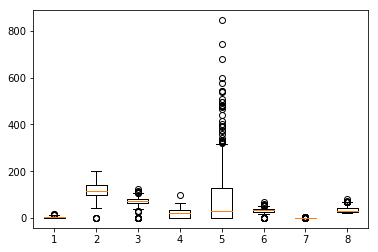

In [6]:
pl.boxplot(pima[:, :8])
pl.show()

## Training attempt without pre-processing

Total percentage correct: 68.49%

Confusion matrix:
[[432  68]
 [174  94]]




/home/jlee/Documents/textbook solutions/Machine Learning - an Algorithmic Perspective/examples/pcn.py:64: RuntimeWarning: overflow encountered in exp
  yi = np.round(1/(1 + np.exp(-hij)), 2)


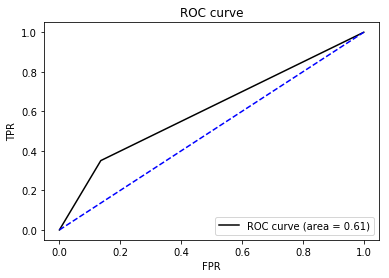

In [7]:
p = pcn.pcn(1, iter = 100, thresh_type = "logistic")
output = np.squeeze(p.trainWeights(pima[:, :8], pima[:, 8]))
output = np.where(output > 0, 1, 0)

results_metrics = confusion_matrix(pima[:, 8], output)
percCorrect = round(np.trace(results_metrics)/np.sum(results_metrics)*100, 2)

resultsStr = "Total percentage correct: " + str(percCorrect) + "%"
print(resultsStr)
print("\nConfusion matrix:")
print(results_metrics)

print("\n")
arrFPR, arrTPR, arrThresh = roc_curve(y_true = pima[:, 8], y_score = output)
flAUC = auc(arrFPR, arrTPR)
pl.figure(0)
pl.plot(arrFPR, arrTPR, label = "ROC curve (area = %0.2f)" % flAUC, color = "black")
pl.plot([0, 1], [0, 1], color = "blue", linestyle = "--")
pl.title("ROC curve")
pl.xlabel("FPR")
pl.ylabel("TPR")
pl.legend(loc = "lower right")
pl.show()

While the correct percentage is above 50%, only the 0 labels seem to be accurate, meaning that we have a high percentage of 1's misclassified as 0's. This is really no better than chance.

## Pre-processing data

Split `pima` dataset up into observation matrix and labels:

In [8]:
data = pima[:, :8]
labels = pima[:, 8]

Create mean deviation form of data:

In [9]:
data = (data - data.mean(axis = 0))/data.var(axis = 0)

Create mean deviation form of labels:

In [10]:
labels = (labels - labels.mean(axis = 0))/labels.var(axis = 0)

## Create training and test datasets

Training datasets:

In [11]:
trainin = data[::2, :]
trainlabels = labels[::2]

Test datasets:

In [12]:
testin = data[1::2, :]
testlabels = labels[1::2]

## Run training and test datasets

Total percentage correct: 65.89%

Confusion matrix:
[[205  44]
 [ 87  48]]




/home/jlee/Documents/textbook solutions/Machine Learning - an Algorithmic Perspective/examples/pcn.py:64: RuntimeWarning: overflow encountered in exp
  yi = np.round(1/(1 + np.exp(-hij)), 2)


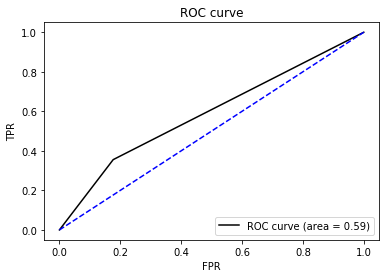

In [13]:
p = pcn.pcn(1, iter = 100, thresh_type = "logistic")
output = np.squeeze(p.trainWeights(trainin, trainlabels))
trainlabels = np.where(trainlabels > 0, 1, 0)

results_metrics = confusion_matrix(trainlabels, output)
percCorrect = round(np.trace(results_metrics)/np.sum(results_metrics)*100, 2)

resultsStr = "Total percentage correct: " + str(percCorrect) + "%"
print(resultsStr)
print("\nConfusion matrix:")
print(results_metrics)

print("\n")
arrFPR, arrTPR, arrThresh = roc_curve(y_true = trainlabels, y_score = output)
flAUC = auc(arrFPR, arrTPR)
pl.figure(1)
pl.plot(arrFPR, arrTPR, label = "ROC curve (area = %0.2f)" % flAUC, color = "black")
pl.plot([0, 1], [0, 1], color = "blue", linestyle = "--")
pl.title("ROC curve")
pl.xlabel("FPR")
pl.ylabel("TPR")
pl.legend(loc = "lower right")
pl.show()

Test set
Total percentage correct: 65.1%

Confusion matrix:
[[207  44]
 [ 90  43]]




/home/jlee/Documents/textbook solutions/Machine Learning - an Algorithmic Perspective/examples/pcn.py:64: RuntimeWarning: overflow encountered in exp
  yi = np.round(1/(1 + np.exp(-hij)), 2)


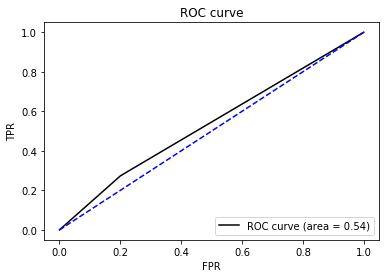

In [14]:
output = np.squeeze(p.forwardPredict(testin))
testlabels = np.where(testlabels > 0, 1, 0)

results_metrics = confusion_matrix(testlabels, output)
percCorrect = round(np.trace(results_metrics)/np.sum(results_metrics)*100, 2)

resultsStr = "Total percentage correct: " + str(percCorrect) + "%"
print("Test set")
print(resultsStr)
print("\nConfusion matrix:")
print(results_metrics)

print("\n")
arrFPR, arrTPR, arrThresh = roc_curve(y_true = trainlabels, y_score = output)
flAUC = auc(arrFPR, arrTPR)
pl.figure(2)
pl.plot(arrFPR, arrTPR, label = "ROC curve (area = %0.2f)" % flAUC, color = "black")
pl.plot([0, 1], [0, 1], color = "blue", linestyle = "--")
pl.title("ROC curve")
pl.xlabel("FPR")
pl.ylabel("TPR")
pl.legend(loc = "lower right")
pl.show()

## Data cleaning

Split `pima` dataset up into observation matrix and labels:

In [15]:
data = pima[:, :8]
labels = pima[:, 8]

### Initial visualizations and statistics

Show a boxplot of all data:

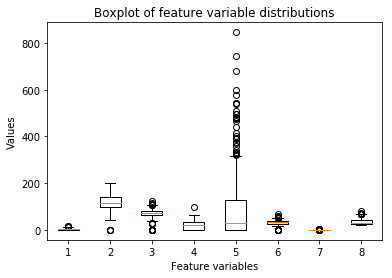

In [16]:
pl.figure()
pl.boxplot(data)
pl.title("Boxplot of feature variable distributions")
pl.xlabel("Feature variables")
pl.ylabel("Values")
pl.show()

Look for correlations in the data:

In [17]:
print(np.corrcoef(data.T).round(2))

[[ 1.    0.13  0.14 -0.08 -0.07  0.02 -0.03  0.54]
 [ 0.13  1.    0.15  0.06  0.33  0.22  0.14  0.26]
 [ 0.14  0.15  1.    0.21  0.09  0.28  0.04  0.24]
 [-0.08  0.06  0.21  1.    0.44  0.39  0.18 -0.11]
 [-0.07  0.33  0.09  0.44  1.    0.2   0.19 -0.04]
 [ 0.02  0.22  0.28  0.39  0.2   1.    0.14  0.04]
 [-0.03  0.14  0.04  0.18  0.19  0.14  1.    0.03]
 [ 0.54  0.26  0.24 -0.11 -0.04  0.04  0.03  1.  ]]


Feature variable #4 (triceps skin fold thickness) is pretty highly correlated with #5 (2-hour serum insulin) and #6 (BMI). Consider getting rid of #4 after processing the other variables.

### Number of pregnancies

Show feature variable #1 (number of times pregnant) in boxplot form:

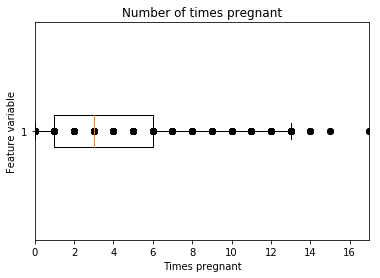

In [18]:
pl.figure()
pl.scatter(data[:, 0], np.ones(np.shape(data[:, 0])[0]), color = "black")
pl.boxplot(data[:, 0], vert = 0)
pl.title("Number of times pregnant")
pl.xlabel("Times pregnant")
pl.ylabel("Feature variable")
pl.xlim(np.min(data[:, 0]), np.max(data[:, 0]))
pl.show()

Set number of pregnancies to max out at 8:

In [19]:
data[data[:, 0] > 8, 0] = 8

Show feature variable #1 (number of times pregnant) in boxplot form after processing:

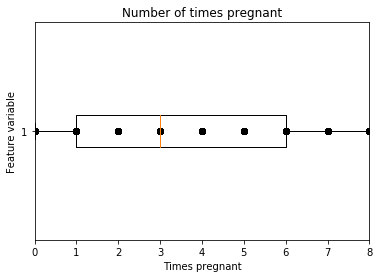

In [20]:
pl.figure()
pl.scatter(data[:, 0], np.ones(np.shape(data[:, 0])[0]), color = "black")
pl.boxplot(data[:, 0], vert = 0)
pl.title("Number of times pregnant")
pl.xlabel("Times pregnant")
pl.ylabel("Feature variable")
pl.xlim(np.min(data[:, 0]), np.max(data[:, 0]))
pl.show()

### Plasma glucose concentration

Show feature variable #2 (plasma glucose concentration) in boxplot form:

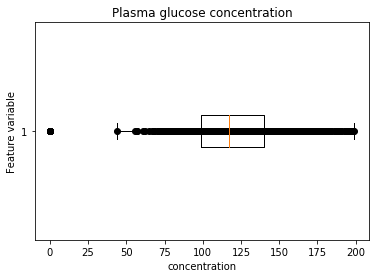

In [21]:
pl.figure()
pl.scatter(data[:, 1], np.ones(np.shape(data[:, 1])[0]), color = "black")
pl.boxplot(data[:, 1], vert = 0)
pl.title("Plasma glucose concentration")
pl.xlabel("concentration")
pl.ylabel("Feature variable")
pl.show()

### Diastolic blood pressure

Show feature variable #3 (diastolic blood pressure) in boxplot form:

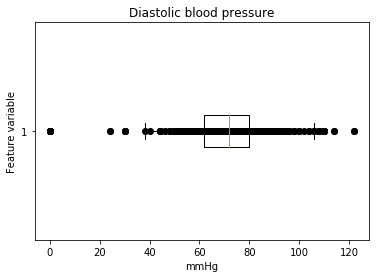

In [22]:
pl.figure()
pl.scatter(data[:, 2], np.ones(np.shape(data[:, 2])[0]), color = "black")
pl.boxplot(data[:, 2], vert = 0)
pl.title("Diastolic blood pressure")
pl.xlabel("mmHg")
pl.ylabel("Feature variable")
pl.show()

### Triceps skin fold thickness

Show feature variable #4 (triceps skin fold thickness) in boxplot form:

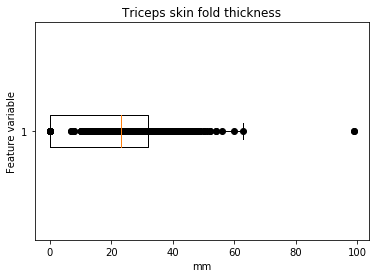

In [23]:
pl.figure()
pl.scatter(data[:, 3], np.ones(np.shape(data[:, 3])[0]), color = "black")
pl.boxplot(data[:, 3], vert = 0)
pl.title("Triceps skin fold thickness")
pl.xlabel("mm")
pl.ylabel("Feature variable")
pl.show()

### Serum insulin

Show feature variable #5 (serum insulin) in boxplot form:

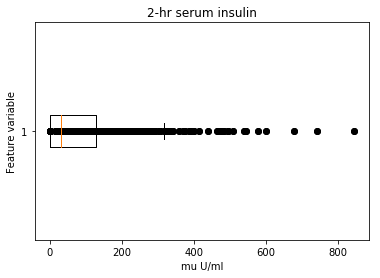

In [24]:
pl.figure()
pl.scatter(data[:, 4], np.ones(np.shape(data[:, 4])[0]), color = "black")
pl.boxplot(data[:, 4], vert = 0)
pl.title("2-hr serum insulin")
pl.xlabel("mu U/ml")
pl.ylabel("Feature variable")
pl.show()

Have serum insulin max out at 38 mu U/ml:

In [25]:
data[data[:, 4] > 300, 4] = 300

Show feature variable #5 (serum insulin) in boxplot form after processing:

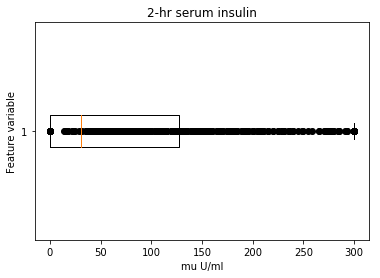

In [26]:
pl.figure()
pl.scatter(data[:, 4], np.ones(np.shape(data[:, 4])[0]), color = "black")
pl.boxplot(data[:, 4], vert = 0)
pl.title("2-hr serum insulin")
pl.xlabel("mu U/ml")
pl.ylabel("Feature variable")
pl.show()

### BMI

Show feature variable #6 (BMI) in boxplot form:

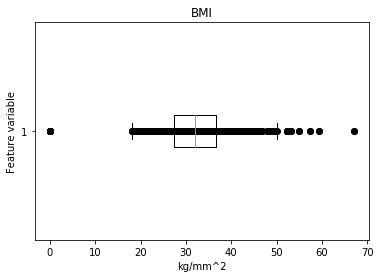

In [27]:
pl.figure()
pl.scatter(data[:, 5], np.ones(np.shape(data[:, 5])[0]), color = "black")
pl.boxplot(data[:, 5], vert = 0)
pl.title("BMI")
pl.xlabel("kg/mm^2")
pl.ylabel("Feature variable")
pl.show()

### Diabetes pedigree function

Show feature variable #7 (diabetes pedigree function) in boxplot form:

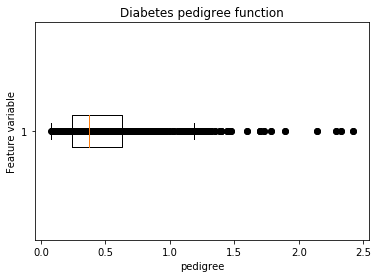

In [28]:
pl.figure()
pl.scatter(data[:, 6], np.ones(np.shape(data[:, 6])[0]), color = "black")
pl.boxplot(data[:, 6], vert = 0)
pl.title("Diabetes pedigree function")
pl.xlabel("pedigree")
pl.ylabel("Feature variable")
pl.show()

### Age

Show feature variable #8 (age) in boxplot form:

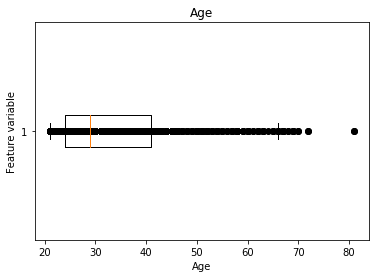

In [29]:
pl.figure()
pl.scatter(data[:, 7], np.ones(np.shape(data[:, 7])[0]), color = "black")
pl.boxplot(data[:, 7], vert = 0)
pl.title("Age")
pl.xlabel("Age")
pl.ylabel("Feature variable")
pl.show()

Quantize ages:

In [30]:
data[(data[:, 7] <= 30), 7] = 1
indices2 = np.where((data[:, 7] > 30) & (data[:, 7] <= 40))
data[indices2, 7] = 2
data[(data[:, 7] > 40), 7] = 3

Show feature variable #8 (age) in boxplot form after processsing:

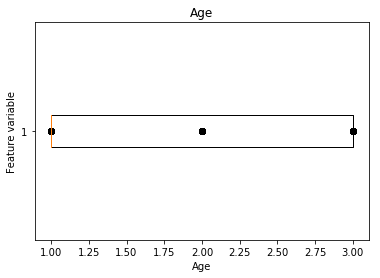

In [31]:
pl.figure()
pl.scatter(data[:, 7], np.ones(np.shape(data[:, 7])[0]), color = "black")
pl.boxplot(data[:, 7], vert = 0)
pl.title("Age")
pl.xlabel("Age")
pl.ylabel("Feature variable")
pl.show()

Delete highly correlated feature variable #4:

In [32]:
data = np.delete(data, 3, axis = 1)

Show a boxplot of all data after processing:

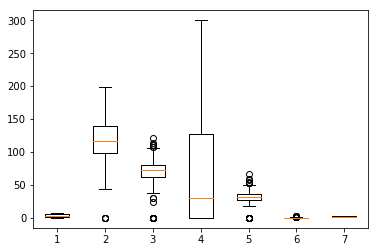

In [33]:
pl.boxplot(data)
pl.show()

Create mean deviation form of data:

In [34]:
data = (data - data.mean(axis = 0))/data.var(axis = 0)

Create mean deviation form of labels:

In [35]:
labels = (labels - labels.mean(axis = 0))/labels.var(axis = 0)

## Run training and test datasets on cleaned data

Select feature variables:

In [56]:
# vectFeatVar = range(np.shape(data)[1]);
vectFeatVar = [4, 5, 6]

Training datasets:

In [57]:
trainin = data[::2, vectFeatVar]
trainlabels = labels[::2]

Test datasets:

In [58]:
testin = data[1::2, vectFeatVar]
testlabels = labels[1::2]

Total percentage correct: 67.71%

Confusion matrix:
[[192  57]
 [ 67  68]]
[0 1]
[0 1]




/home/jlee/Documents/textbook solutions/Machine Learning - an Algorithmic Perspective/examples/pcn.py:64: RuntimeWarning: overflow encountered in exp
  yi = np.round(1/(1 + np.exp(-hij)), 2)


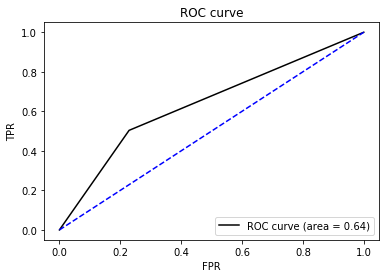

In [59]:
p = pcn.pcn(1, iter = 90, eta = 0.25, thresh_type = "logistic")
output = np.squeeze(p.trainWeights(trainin, trainlabels))
trainlabels = np.where(trainlabels > 0, 1, 0)

results_metrics = confusion_matrix(trainlabels, output)
percCorrect = round(np.trace(results_metrics)/np.sum(results_metrics)*100, 2)

resultsStr = "Total percentage correct: " + str(percCorrect) + "%"
print(resultsStr)
print("\nConfusion matrix:")
print(results_metrics)

print(np.unique(output))
print(np.unique(trainlabels))

print("\n")
arrFPR, arrTPR, arrThresh = roc_curve(y_true = trainlabels, y_score = output)
flAUC = auc(arrFPR, arrTPR)
pl.figure(3)
pl.plot(arrFPR, arrTPR, label = "ROC curve (area = %0.2f)" % flAUC, color = "black")
pl.plot([0, 1], [0, 1], color = "blue", linestyle = "--")
pl.title("ROC curve")
pl.xlabel("FPR")
pl.ylabel("TPR")
pl.legend(loc = "lower right")
pl.show()

Test set
Total percentage correct: 68.49%

Confusion matrix:
[[200  51]
 [ 70  63]]




/home/jlee/Documents/textbook solutions/Machine Learning - an Algorithmic Perspective/examples/pcn.py:64: RuntimeWarning: overflow encountered in exp
  yi = np.round(1/(1 + np.exp(-hij)), 2)


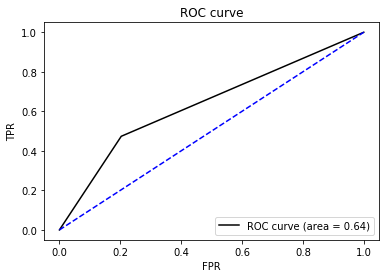

In [60]:
output = np.squeeze(p.forwardPredict(testin))
testlabels = np.where(testlabels > 0, 1, 0)

results_metrics = confusion_matrix(testlabels, output)
percCorrect = round(np.trace(results_metrics)/np.sum(results_metrics)*100, 2)

resultsStr = "Total percentage correct: " + str(percCorrect) + "%"
print("Test set")
print(resultsStr)
print("\nConfusion matrix:")
print(results_metrics)

print("\n")
arrFPR, arrTPR, arrThresh = roc_curve(y_true = testlabels, y_score = output)
flAUC = auc(arrFPR, arrTPR)
pl.figure(4)
pl.plot(arrFPR, arrTPR, label = "ROC curve (area = %0.2f)" % flAUC, color = "black")
pl.plot([0, 1], [0, 1], color = "blue", linestyle = "--")
pl.title("ROC curve")
pl.xlabel("FPR")
pl.ylabel("TPR")
pl.legend(loc = "lower right")
pl.show()